<a href="https://colab.research.google.com/github/RAGUL1531/Irsis-Flowers-detection/blob/main/Iris_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:                                                             
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1.sepal length in cm                                                             
2.sepal width in cm                                                              
3.petal length in cm                                                                 
4.petal width in cm                                                              
class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

**Import modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Loading the dataset**

In [ ]:
data=pd.read_csv("/content/IRIS.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**DATA PREPOROCESSING**

In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


THERE IS NO DUPLICATE VALUES

**Exploratory Data Analysis**

<Axes: >

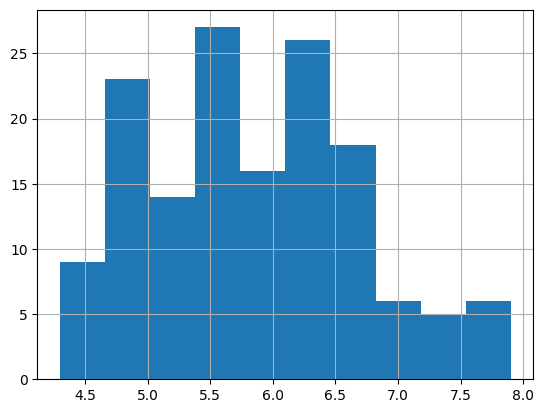

In [ ]:
# histograms
data['sepal_length'].hist()

<Axes: >

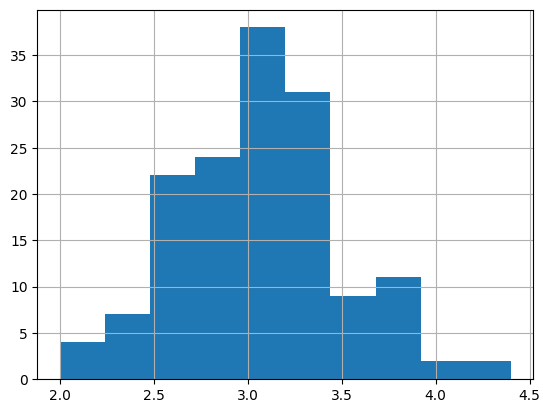

In [ ]:
data['sepal_width'].hist()

<Axes: >

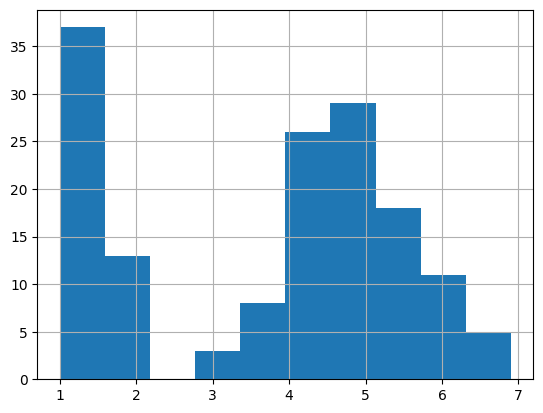

In [ ]:
data['petal_length'].hist()

<Axes: >

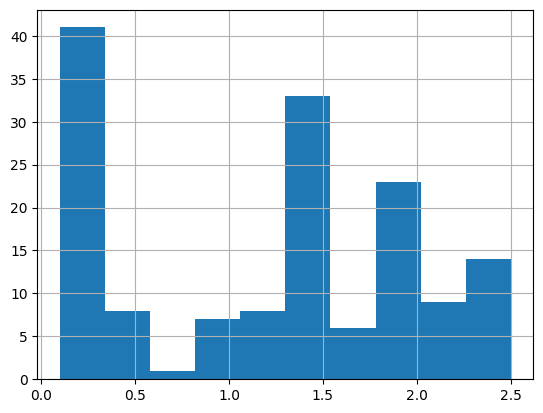

In [ ]:
data['petal_width'].hist()

In [ ]:
data['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


The data set is balanced

<Axes: >

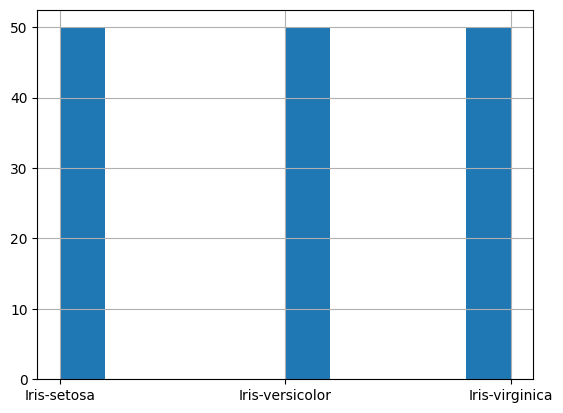

In [ ]:
data['species'].hist()

**Coorelation Matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [ ]:
data.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

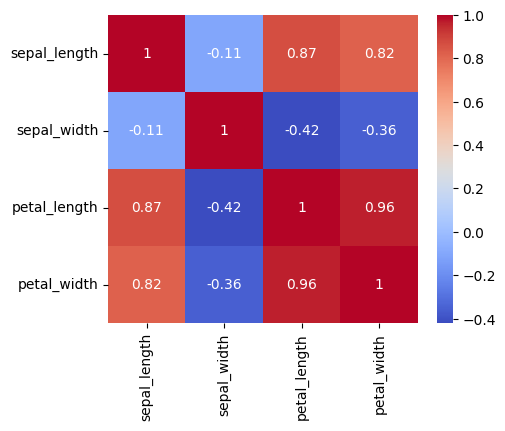

In [ ]:
cor=data.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(cor, annot=True, ax=ax, cmap = 'coolwarm')


**Label Encoder **                                                         
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

MODEL TRAINING

Split the data into features and target

X=>Features Y=>Labels

In [ ]:
X=data.drop(['species'],axis=1)
Y=data['species']
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


Split the data into Training and Testing Data

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

**Select the Model**

In [ ]:
model=LogisticRegression()

Train the model with Training dataset

In [ ]:
model.fit(Xtrain,Ytrain)

LogisticRegression()

**MODEL EVAULATION**

Evaluate The model by using training data

In [ ]:
Xtrain_predict=model.predict(Xtrain)
train_accuracy=accuracy_score(Xtrain_predict,Ytrain)
report_test=classification_report(Xtrain_predict,Ytrain)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.97      0.95        38
           2       0.97      0.93      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:
print("Accuracy of Training Data",train_accuracy)

Accuracy of Training Data 0.9666666666666667


Evaluate the model by  using testing data

In [ ]:
Xtest_predict=model.predict(Xtest)
test_accuracy=accuracy_score(Xtest_predict,Ytest)
report_test=classification_report(Xtest_predict,Ytest)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Accuracy of testing Data",test_accuracy)

Accuracy of testing Data 1.0
